In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
np.set_printoptions(precision=2)

In [18]:
# Movies
movies_raw = pd.read_csv("/Users/anup.sethuram/fs/DATA/OPEN_DATA/movies.csv")
movies_raw.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [19]:
y = movies_raw.pop('gross')
X = movies_raw.copy(deep=True)


In [20]:
print(X.columns)
print(X.shape, y.shape)

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'company',
       'runtime'],
      dtype='object')
(7668, 14) (7668,)


In [21]:
num_cols = []
cat_cols = [] 
for col in X.columns:
    if X[col].dtype == 'object' or col == 'year':
        cat_cols.append(col)
    else:
        num_cols.append(col)
        
print(f"Numerical cols: {num_cols} \nCategorical cols: {cat_cols}")

Numerical cols: ['score', 'votes', 'budget', 'runtime'] 
Categorical cols: ['name', 'rating', 'genre', 'year', 'released', 'director', 'writer', 'star', 'country', 'company']


In [22]:
sel_cat_cols = cat_cols.copy()
sel_cat_cols.remove('name')
X[sel_cat_cols] = X[sel_cat_cols].astype('category')
X[sel_cat_cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   rating    7591 non-null   category
 1   genre     7668 non-null   category
 2   year      7668 non-null   category
 3   released  7666 non-null   category
 4   director  7668 non-null   category
 5   writer    7665 non-null   category
 6   star      7667 non-null   category
 7   country   7665 non-null   category
 8   company   7651 non-null   category
dtypes: category(9)
memory usage: 687.4 KB


In [23]:
# Find no. of uniques #cardinality?
for col in sel_cat_cols:
    print(f"Col {col}: {X[col].nunique()}")




Col rating: 12
Col genre: 19
Col year: 41
Col released: 3414
Col director: 2949
Col writer: 4535
Col star: 2814
Col country: 59
Col company: 2385


In [24]:
# Convert categorical to numeric
for col in sel_cat_cols:
    X[col] = X[col].cat.codes 
names = X.pop('name')
X.head()



,rating,genre,year,released,score,votes,director,writer,star,country,budget,company,runtime
0,6,6,0,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,2319,146.0
1,6,1,0,1492,5.8,65000.0,2269,1632,327,55,4500000.0,731,104.0
2,4,0,0,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,1540,124.0
3,4,4,0,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,1812,88.0
4,6,4,0,1543,7.3,108000.0,1054,521,410,55,6000000.0,1777,98.0


In [25]:
X = X.fillna(0)
y = y.replace(np.nan, 0)

#### Visualize the data

In [26]:
X.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,company,runtime
0,6,6,0,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,2319,146.0
1,6,1,0,1492,5.8,65000.0,2269,1632,327,55,4500000.0,731,104.0
2,4,0,0,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,1540,124.0
3,4,4,0,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,1812,88.0
4,6,4,0,1543,7.3,108000.0,1054,521,410,55,6000000.0,1777,98.0


In [28]:
X_n = X.to_numpy()
y_n = y.to_numpy()

fig,ax=plt.subplots(3, 4, figsize=(15, 10), sharey=True)
for i in range(3):
    for j in range(4):
        ax[i,j].scatter(X_n[:,i*4+j], y_n)
        ax[i,j].set_xlabel(X.columns[i*4+j])

ax[0, 0].set_ylabel("Gross")
plt.show()


AttributeError: module 'matplotlib.cbook' has no attribute '_unpack_to_numpy'

<Figure size 1080x720 with 0 Axes>

In [299]:
# Normalize
X = (X - X.mean())/X.std()
X.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,company,runtime
0,0.663024,0.857737,-1.82951,0.006135,2.059747,5.137295,1.255696,1.317074,-0.437726,0.371888,-0.168789,1.267686,2.070447
1,0.663024,-0.954344,-1.82951,-0.208354,-0.601836,-0.141297,0.881169,-0.504911,-1.320875,0.439071,-0.544539,-0.970368,-0.171086
2,-0.875272,-1.316760,-1.82951,0.072597,2.366853,6.809054,-0.474153,0.210268,0.418438,0.439071,-0.194703,0.169799,0.896311
3,-0.875272,0.132905,-1.82951,-0.208354,1.343167,0.813993,-0.251777,-0.223429,1.032962,0.439071,-0.570453,0.553143,-1.025003
4,0.663024,0.132905,-1.82951,-0.156998,0.933693,0.122020,-0.540865,-1.354711,-1.219068,0.439071,-0.505668,0.503816,-0.491304


In [311]:
def compute_cost(X_mat, y_vec, w_vec, b_sca):
    m = X_mat.shape[0]
    # return sum(((np.matmul(X_mat, w_vec) + b_sca) - y_vec) ** 2 ) / (2 * m)

    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X_mat[i],w) + b       
        cost = cost + (f_wb_i - y_vec)**2              
    cost = cost/(2*m)                                 
    # return(np.squeeze(cost)) 
    return cost


In [301]:
def compute_gradient(X_mat, y_vec, w_vec, b_sca):
    m,n = X_mat.shape
    dj_dw = np.zeros((n,))
    dj_db = 0. 

    for i in range(m):
        err = (np.dot(w_vec, X_mat.iloc[i]) + b_sca) - y_vec[i]
        for j in range(n):
            dj_dw[j] += err * X.iloc[i,j]
        dj_db += err
    
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m     

    return  dj_db, dj_dw


# def compute_gradient(X, y, w, b):

#     m, n = X.shape
#     dj_dw = np.zeros((n,))
#     dj_db = 0. 

#     for i in range(m):
#         err = (np.dot(X[i], w) + b) - y[i]
#         for j in range(n):
#             dj_dw[j] += err * X[i, j]
#         dj_db += err
        
#     dj_dw = dj_dw / m                                
#     dj_db = dj_db / m     

#     return  dj_db, dj_dw




In [305]:
def gradient_descent(X_mat, y_vec, w_in, b_in, alpha, num_iters): 
    # An array to store values at each iteration primarily for graphing later
    hist={}
    hist["cost"] = []; hist["params"] = []; hist["grads"]=[]; hist["iter"]=[];
    
    save_interval = np.ceil(num_iters/10000) # prevent resource exhaustion for long runs

    w_vec = copy.deepcopy(w_in)  #avoid modifying global w within function
    b_sca = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = compute_gradient(X_mat, y_vec, w_vec, b_sca)   ##None

        # Update Parameters using w, b, alpha and gradient
        w_vec = w_vec - alpha * dj_dw               ##None
        b_sca = b_sca - alpha * dj_db               ##None
      
        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0:     
            hist["cost"].append(compute_cost(X_mat, y_vec, w_vec, b_sca))
            hist["params"].append([w_vec,b_sca])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = compute_cost(X_mat, y_vec, w_vec, b_sca)
            print(f"Iteration {i:9d}, Cost: {cst}")
        
    return w_vec, b_sca, hist #return final w,b and J history for graphing

In [306]:
#Compute and display gradient 
w = np.zeros(X.shape[1])
b = 0.1
tmp_dj_db, tmp_dj_dw = compute_gradient(X, y, w, b)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -76565668.42791398
dj_dw at initial w,b: 
 [ 1.57e+07  3.84e+07 -4.30e+07 -8.51e+04 -3.05e+07 -1.04e+08  2.45e+06
  3.77e+06  1.85e+05 -1.56e+07 -1.23e+08 -2.57e+07 -4.01e+07]


In [308]:
w = np.zeros(X.shape[1])
b = 0
w_vec, b_sca, J_history = gradient_descent(X, y, w, b, .1, 10)

Iteration         0, Cost: 1.6397365889092942e+16
Iteration         1, Cost: 1.6397365889092942e+16
Iteration         2, Cost: 1.6397365889092942e+16
Iteration         3, Cost: 1.6397365889092942e+16
Iteration         4, Cost: 1.6397365889092942e+16
Iteration         5, Cost: 1.6397365889092942e+16
Iteration         6, Cost: 1.6397365889092942e+16
Iteration         7, Cost: 1.6397365889092942e+16
Iteration         8, Cost: 1.6397365889092942e+16
Iteration         9, Cost: 1.6397365889092942e+16


In [312]:
def plot_cost_i_w(X,y,hist):
    ws = np.array([ p[0] for p in hist["params"]])
    rng = max(abs(ws[:,0].min()),abs(ws[:,0].max()))
    wr = np.linspace(-rng+0.27,rng+0.27,20)
    cst = [compute_cost(X,y,np.array([wr[i],-32, -67, -1.46]), 221) for i in range(len(wr))]

    fig,ax = plt.subplots(1,2,figsize=(12,3))
    ax[0].plot(hist["iter"], (hist["cost"]));  ax[0].set_title("Cost vs Iteration")
    ax[0].set_xlabel("iteration"); ax[0].set_ylabel("Cost")
    ax[1].plot(wr, cst); ax[1].set_title("Cost vs w[0]")
    ax[1].set_xlabel("w[0]"); ax[1].set_ylabel("Cost")
    ax[1].plot(ws[:,0],hist["cost"])
    plt.show()

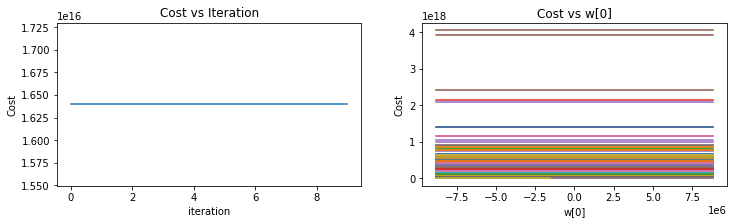

In [313]:
plot_cost_i_w(X.to_numpy(),y.to_numpy(),J_history)
